In [0]:
# import Numpy and Pandas
import numpy as np
import pandas as pd
# for reading and displaying images, import imread and matplotlib
from imageio import imread
import matplotlib.pyplot as plt

# for creating validation set, import train_test_split; understand how the function works
from sklearn.model_selection import train_test_split
# for evaluating the model, import accuracy_score from sklearn
from sklearn.metrics import accuracy_score
# Import necessary PyTorch libraries and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

# Import dataset from pytorch vision - Fashion MNIST
train_set = torchvision.datasets.FashionMNIST( root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()  ]
    )
) 

AxesImage(54,36;334.8x217.44)


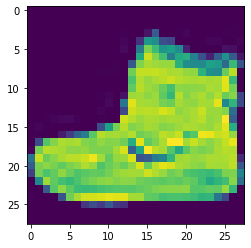

In [85]:
print(plt.imshow(torch.utils.data.DataLoader(train_set).dataset.data[0]))

In [0]:
# Visualise some random images from the datset. Check the shape of tensors to get a better understanding of the dataset.

In [0]:
# Define the network architecture(model) using a class.
# Use conv2d layers, activation function after each such layer, use Batchnorm and Maxpooling. Play with these parameters,
# layers and things like kernel size, stride etc and see how it affects your results.
# Finally use a linear layer in the end
# Define the forward pass
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  def forward(self, t):
    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)
    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2)
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = F.relu(t)
    t = self.fc2(t)
    t = F.relu(t)
    t = self.out(t)
    return t


In [0]:
from collections  import OrderedDict
from collections import namedtuple
from itertools import product

In [34]:
# Define training the model
    # defining the optimizer
    # defining the loss function
    # For each epoch and in each batch:
        # clear the gradients
        # compute the model output
        # calculate loss; store and print them if you wish to print and see if the loss is decreasing.
        # propagate loss backwards
        # update model weights
params = OrderedDict(
    lr = [.01, .001],
    batch_size = [100, 1000],
    shuffle = [False]
)
Run = namedtuple('Run', params.keys())
epochs = 5
runs = []
for v in product(*params.values()):
  runs.append(Run(*v))


# get all runs from params using RunBuilder class
loss_epoch=0
i=0
for run in runs:
    network = Network()
    # load dataset and use dataloader to send the data in batches.
    # Convert data to tensor and normalise it.
    loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = optim.Adam(network.parameters(), lr=run.lr)
    for epoch in range(epochs):
      i=0
      loss_epoch=0
      for batch in loader:
        images = batch[0]
        labels = batch[1]
        preds = network(images)
        loss = F.cross_entropy(preds, labels)
        i+=1
        # print(i,loss)
        loss_epoch+=loss*batch[0].shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      print("===============================================================================================")
      print(epoch,loss_epoch/60000)


0 tensor(0.5399, grad_fn=<DivBackward0>)
1 tensor(0.3705, grad_fn=<DivBackward0>)
2 tensor(0.3426, grad_fn=<DivBackward0>)
3 tensor(0.3273, grad_fn=<DivBackward0>)
4 tensor(0.3174, grad_fn=<DivBackward0>)
0 tensor(1.0740, grad_fn=<DivBackward0>)
1 tensor(0.5408, grad_fn=<DivBackward0>)
2 tensor(0.4421, grad_fn=<DivBackward0>)
3 tensor(0.3830, grad_fn=<DivBackward0>)
4 tensor(0.3557, grad_fn=<DivBackward0>)
0 tensor(0.7958, grad_fn=<DivBackward0>)
1 tensor(0.5152, grad_fn=<DivBackward0>)
2 tensor(0.4492, grad_fn=<DivBackward0>)
3 tensor(0.4086, grad_fn=<DivBackward0>)
4 tensor(0.3785, grad_fn=<DivBackward0>)
0 tensor(1.5496, grad_fn=<DivBackward0>)
1 tensor(0.7882, grad_fn=<DivBackward0>)
2 tensor(0.6905, grad_fn=<DivBackward0>)
3 tensor(0.6361, grad_fn=<DivBackward0>)
4 tensor(0.5959, grad_fn=<DivBackward0>)


In [0]:

# Evaluate model on test set. This is done in the same way as for training but only till calculating output.
# Then,convert output from tensor to numpy format.
# convert to class labels
# store the predictions
# calculate accuracy of model
# Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
# and explain your observations in a text file in the Github repository.

In [0]:
test_set = torchvision.datasets.FashionMNIST( root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()  ]
    )
)

In [0]:
def get_all_preds(model, loader):
  print("ok")
  labels=[]
  images =[]
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch
    print("a")
    preds = model(images)
    all_preds = torch.cat(
        (all_preds, preds),
        dim = 0
    )
  return all_preds,labels,images


In [91]:
prediction_loader = torch.utils.data.DataLoader(test_set, batch_size=10000)
test_preds,labels,images= get_all_preds(network, prediction_loader)


ok
a


In [86]:
test_result=test_preds.detach().numpy().argmax(axis=1)
labels = labels.detach().numpy()

print(labels.shape)
print(test_result.shape)

(10000,)
(10000,)


In [68]:
count=0
for i in range(0,len(labels)):
  if labels[i]!=test_result[i]:
    count+=1
print("accuracy = ",100-count/100)

accuracy =  78.11


  
  Try to improve accuracy by changing parameters, optimizer, loss functions, epochs etc
  and explain your observations in a text file in the Github repository.
  

In [0]:
label_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

predictes are 
1 Ankle boot
2 Pullover
3 Trouser
4 Trouser
5 Shirt
6 Trouser
7 Pullover
8 Coat
9 Sandal
10 Sneaker


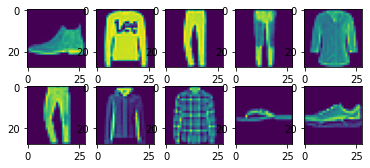

In [110]:
# check predictions by printing the output image for random test inputs.
# images=images.detach().numpy()
random_images = np.random.randint(0,10000,10)
print("predictes are ")
columns=5
for i, image in enumerate(random_images):
    plt.subplot(len(random_images) / columns + 1, columns, i + 1)
    print(i+1,label_names[test_result[i]])
    plt.imshow(images[i].squeeze())

#the model accuracy is about 78.11%

#===========END================